## Exploratory Data Analysis & Data Storytelling

In this notebook, we
1. Reload graph data from previous notebooks.
2. Categorize graphs into different types and try to find out good graph metrics for graph structure complexity.

References:
1. [Networks Connectivity](https://networkx.github.io/documentation/stable/reference/algorithms/connectivity.html)

### Load Packages

In [1]:
import sys
import networkx as nx
import networkx.generators as nx_gen_graph
import networkx.algorithms.connectivity as nx_connectivity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Prepare Functions for Plotting

In [2]:
def get_sub_plot(width = 10, height = 6, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    fig.set_size_inches(20, 20 / n_cols * n_rows)
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

In [3]:
def draw_graph(graph):
    ax = get_sub_plot()
    nx.draw_networkx(graph, ax = ax)
    
def draw_graphs(graphs, titles, n_cols = 2):
    n_total_cols = len(graphs)
    
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    for graph, title, ax in zip(graphs, titles, axes):
        nx.draw_networkx(graph, ax = ax)
        ax.set_title(title, size = 20)
                                
    fig.tight_layout()    
    plt.show()

### Prepare Function for Recreate Graphs

In [4]:
def create_graphs(data):
    graphs = []

    for index, row in data.iterrows():
        G = nx.parse_edgelist(row['Edge Lists'])    
        graphs.append(G)
        
    return graphs

### Loda Data

In [5]:
data_dir = '../Data/*.pkl'
! ls {data_dir}

../Data/graphs.pkl


In [6]:
# Load data for the traning set
df = pd.read_pickle('../Data/graphs.pkl')

### Recreate the Graphs

In [7]:
graphs = create_graphs(df)

### Calculate Different Metrics

1. [Average Clustering Coefficient](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering)
2. [Stoer-Wagner minimum cut](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.connectivity.stoerwagner.stoer_wagner.html#networkx.algorithms.connectivity.stoerwagner.stoer_wagner) [Wiki](https://en.wikipedia.org/wiki/Stoer%E2%80%93Wagner_algorithm)
3. [Average Node Connectivity](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.connectivity.connectivity.average_node_connectivity.html#networkx.algorithms.connectivity.connectivity.average_node_connectivity)

In [8]:
df['Avg Clustering Coefficient'] = [nx.average_clustering(graph) for graph in graphs]

cut_values = []
for graph in graphs:
    cut_value, partition = nx_connectivity.stoerwagner.stoer_wagner(graph)
    cut_values.append(cut_value)
    
df['Stoer Wagner'] = cut_values

df['Avg Node Connectivity'] = [nx_connectivity.connectivity.average_node_connectivity(graph) for graph in graphs]

### Inspect Results and Compare to the Drawings

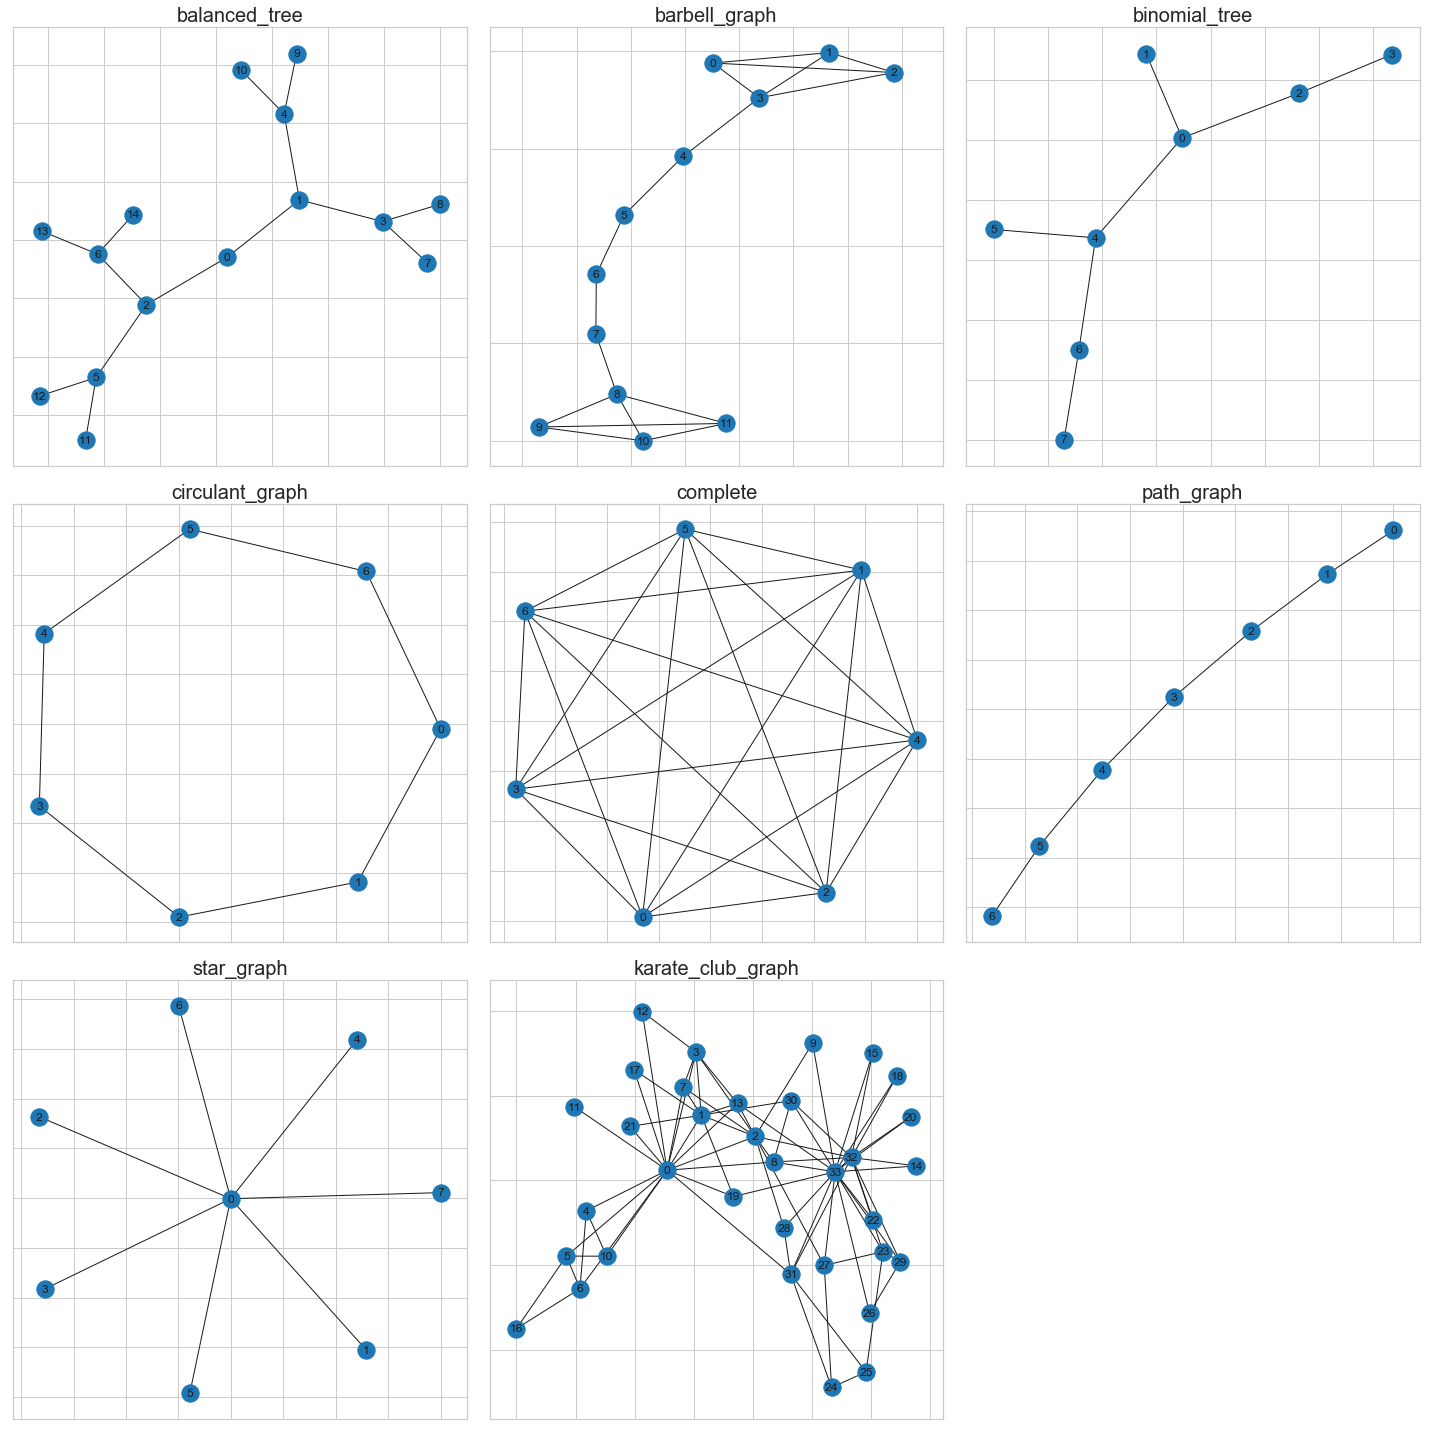

In [9]:
draw_graphs(graphs, df['Graph Type'], n_cols = 3)

Observations:

Look at above graph drawings, we can kind of sort them with structure complexity in the following order:
complete > karate_club > barbell (depending on big the complete graph is compared to the complete graph in #1) > circulant > balanced tree ~= binomial > star ~= path 

Note:
If the structure is simpler, it's easer for graph drawing as well, i.e., less edges are crossed. So looks like number of crossing of the graph drawing can be another indicator.

In [10]:
df

,Graph Type,Number of Nodes,Number of Edges,Degree,Density,Number of Selfloops,Nodes,Edges,Edge Lists,Avg Clustering Coefficient,Stoer Wagner,Avg Node Connectivity
0,balanced_tree,15,14,"((0, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3...",0.133333,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","((0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6...","[0 1 {}, 0 2 {}, 1 3 {}, 1 4 {}, 2 5 {}, 2 6 {...",0.000000,1,1.000000
1,barbell_graph,12,17,"((0, 3), (1, 3), (2, 3), (3, 4), (4, 2), (5, 2...",0.257576,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","((0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3...","[0 1 {}, 0 2 {}, 0 3 {}, 1 2 {}, 1 3 {}, 2 3 {...",0.583333,1,1.363636
2,binomial_tree,8,7,"((0, 3), (1, 1), (2, 2), (3, 1), (4, 3), (5, 1...",0.250000,0,"(0, 1, 2, 3, 4, 5, 6, 7)","((0, 1), (0, 2), (0, 4), (2, 3), (4, 5), (4, 6...","[0 1 {}, 0 2 {}, 0 4 {}, 2 3 {}, 4 5 {}, 4 6 {...",0.000000,1,1.000000
3,circulant_graph,7,7,"((0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...",0.333333,0,"(0, 1, 2, 3, 4, 5, 6)","((0, 6), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5...","[0 6 {}, 0 1 {}, 1 2 {}, 2 3 {}, 3 4 {}, 4 5 {...",0.000000,2,2.000000
4,complete,7,21,"((0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6...",1.000000,0,"(0, 1, 2, 3, 4, 5, 6)","((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...","[0 1 {}, 0 2 {}, 0 3 {}, 0 4 {}, 0 5 {}, 0 6 {...",1.000000,6,6.000000
5,path_graph,7,6,"((0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...",0.285714,0,"(0, 1, 2, 3, 4, 5, 6)","((0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6))","[0 1 {}, 1 2 {}, 2 3 {}, 3 4 {}, 4 5 {}, 5 6 {}]",0.000000,1,1.000000
6,star_graph,8,7,"((0, 7), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...",0.250000,0,"(0, 1, 2, 3, 4, 5, 6, 7)","((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...","[0 1 {}, 0 2 {}, 0 3 {}, 0 4 {}, 0 5 {}, 0 6 {...",0.000000,1,1.000000
7,karate_club_graph,34,78,"((0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5,...",0.139037,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...","[0 1 {}, 0 2 {}, 0 3 {}, 0 4 {}, 0 5 {}, 0 6 {...",0.570638,1,2.217469


### Conclusion

1. Average node connectivity seems to be a better metric than average clustering coefficient on circulant graph since average clustering coefficient only "sees" triangle but no circle.
2. Average node connectivity seems to be a better metric than one-level stoer wagner on barbell graph.
3. In general average node connectivity seems to better than the rest two metrics.

Todo:
* Need to add more different types of graph.
* Need to try out more metrics.